### On the Responsible use of Pseudo-Random Number Generators in Scientific Research

#### Notebook by: [crahal](https://github.com/crahal/).

#### Last modified: 1.04.2024

#### Section 0

Lets first load in some dependancies. Note, all the plotting functions can be found in `./src/helper_figure_plotters.py`. The data lives as outputs from other scripts in `./src`, and invariably pulls in results from `./data/`. Figures get _output_ to `figure_path`, defined below. As always, we rely heavily on `pandas`.

In [1]:
import os
import warnings
import pandas as pd
from helper_figure_plotters import load_sympt,\
                                   plot_three_predictions,\
                                   plot_mvprobit,\
                                   plot_four_simple_examples,\
                                   plot_collisions,\
                                   plot_topics_barplot,\
                                   plot_ffc
warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

In [17]:
import json
file_path_100 = os.path.join(os.getcwd(),
                             '..',
                             'data',
                             'rnom',
                             'rnom_samples100_seeds100000_results.json')
with open(file_path_100, 'r') as file:
    data_dict_100 = json.load(file)
    
print(f"The minimum mean value is: {data_dict_100['min_val']}")
print(f"The maximum mean value is: {data_dict_100['max_val']}")

The minimum mean value is-0.4317892661417437
The maximum mean value is 0.415586882007415


#### Section 1

Lets plot the results from four simple simulation examples, which are grouped together into what is probably 'Figure 1' in the accompanying academic paper. The four examples are:

* 'a.': The expectation of a hundred random normal draws
* 'b.': Replicating buffon's needle experiment with different seeds.
* 'c.': Estimating the number of collisions within a 32-bit Mersenne Twister implementation.
    - This is loosely based on work of Hofert (2020, The American Statisician), available [here].(https://arxiv.org/abs/2003.08009v2)
* 'd.': A simple random walk prediction (of Bitcoin).

[*********************100%%**********************]  1 of 1 completed


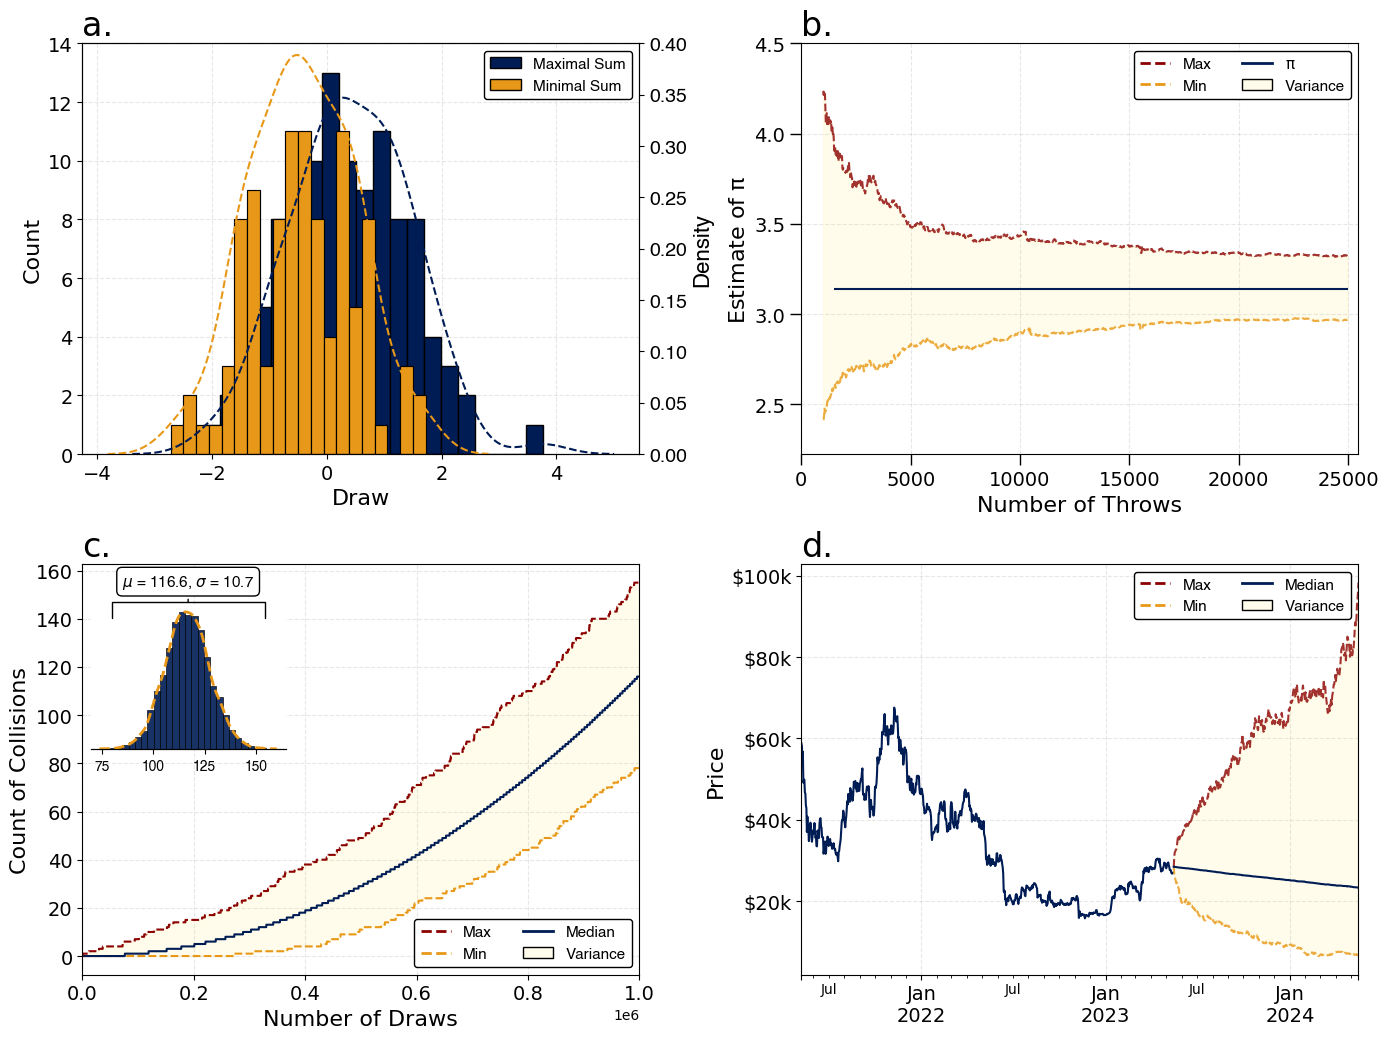

In [2]:
plot_four_simple_examples(figure_path)

#### Section 2

Lets now move on from these simple simulations to consider some more elaborate replications, all of different shapes and sizes. First, lets load in the predictions generated on the [SAIL](https://saildatabank.com/) VM with the symptomtracker data. It loosely repicates Menni et al. (2020, Nature Medicine), available [here](https://www.nature.com/articles/s41591-020-0916-2).

In [3]:
filename = 'roc_auc_full_firstwave_5folds_10kseeds_stratified.csv'
first_wave_10k_stratified_list = load_sympt(filename)

Then, lets use this data, and plot it along side two other types of predictions:
    
* A simple, more teaching-orientated example (predicting house prices)
* Computer Vision example with a convolutional neural network (recognising MNIST).

Covid min:  0.6706358899202085
Covid max:  0.8123153511526741
Covid mean:  0.7430775679453714
Housing min:  0.6286547695616572
Housing max:  0.67789250745027
Housing mean:  0.6552080622975259
MNIST min:  9001
MNIST max:  9728
MNIST mean:  9623.3025


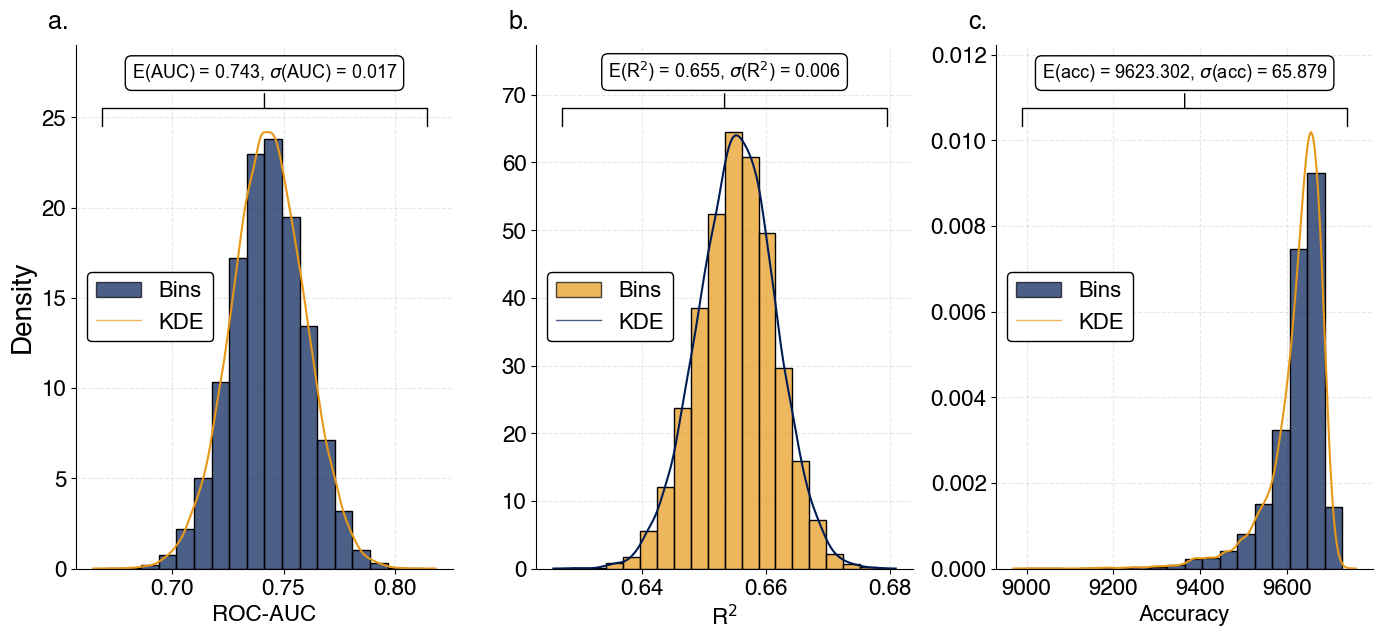

In [19]:
plot_three_predictions(first_wave_10k_stratified_list, figure_path)

Now lets move on to a more familiar statistical\econometric example. This is based on the `mvprobit` Stata package of Cappellari and Jenkins (2003, The Stata Journal), available [here](https://journals.sagepub.com/doi/pdf/10.1177/1536867X0300300305).

Min value of $\rho_{21}$ at 2 draws: -0.53390896
Max value of $\rho_{21}$ at 2 draws: 0.25147465
Min value of $\rho_{21}$ at 150 draws: -0.35242346
Max value of $\rho_{21}$ at 150 draws: -0.18469827


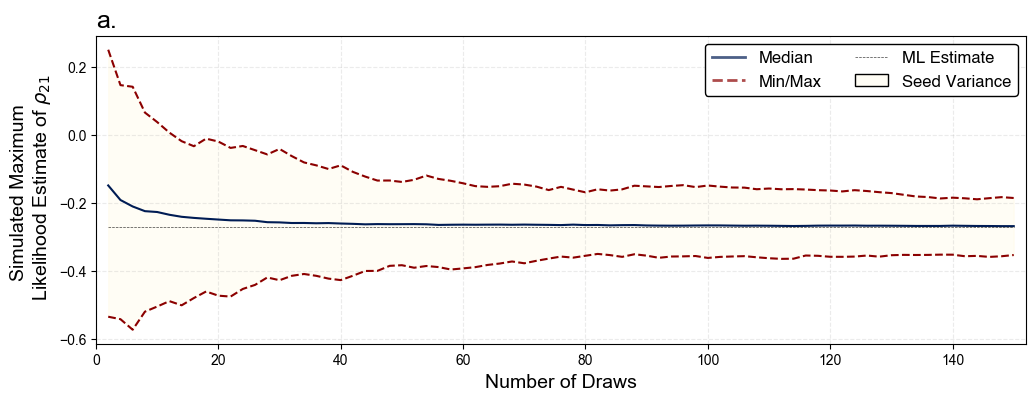

In [5]:
plot_mvprobit(figure_path)

We next assess the effect of seeds on the instrumental Fragile Families Challenge of Salganik et al. (2020, PNAS), available [here](https://www.pnas.org/doi/10.1073/pnas.1915006117). Here, the seed variability stems from the [Amelia](https://cran.r-project.org/web/packages/Amelia/index.html) package. Note that to replicate this work, you'll need to download the FFC replication materials from the Harvard dataverse (available [here](https://dataverse.harvard.edu/dataset.xhtml;jsessionid=cafb079a3ebb9e708c193e78ac20?persistentId=doi%3A10.7910%2FDVN%2FCXSECU&version=&q=&fileTypeGroupFacet=%22Image%22&fileAccess=)).

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
gpa. Min beta :0.1193. Max beta: 0.2435. Min R2: 0.0558. Max R2: 0.1498
grit. Min beta :-0.0104. Max beta: 0.0747. Min R2: 0.0023. Max R2: 0.0228
materialHardship. Min beta :0.3538. Max beta: 0.3779. Min R2: 0.1657. Max R2: 0.1892
eviction. Min beta :1.5946. Max beta: 1.9301. Min R2: 0.0098. Max R2: 0.0209
jobTraining. Min beta :0.601. Max beta: 0.8201. Min R2: 0.0443. Max R2: 0.0559
layoff. Min beta :0.2313. Max beta: 0.4929. Min R2: 0.0032. Max R2: 0.0117


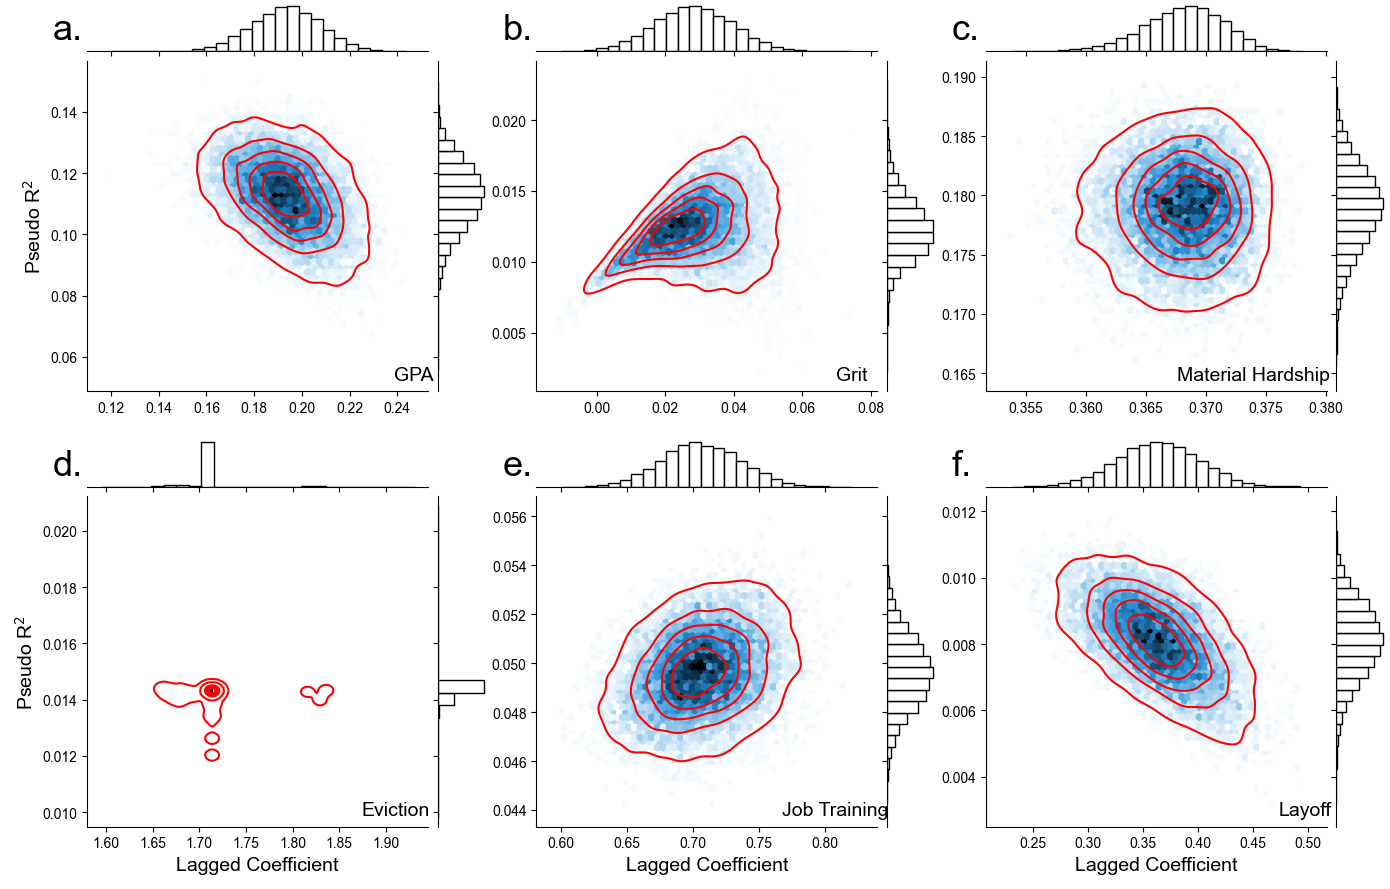

In [56]:
import os
import warnings
import pandas as pd
from helper_figure_plotters import load_sympt,\
                                   plot_three_predictions,\
                                   plot_mvprobit,\
                                   plot_four_simple_examples,\
                                   plot_collisions,\
                                   plot_topics_barplot,\
                                   plot_ffc

%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")
figure_path = os.path.join(os.getcwd(), '..', 'figures')

ffc = pd.read_csv(os.path.join(os.getcwd(), '..', 'data', 'ffc',
                               'output', 'seed',
                               'seed_analysis_10000.csv'))
plot_ffc(ffc, figure_path)

Finally, we utilise the immensely popular BERTopic algorithm by of Grootendorst (2022), available here [here](https://arxiv.org/pdf/2203.05794.pdf). In these examples, we use four sets of abstracts obtained from [dimensions.ai](https://www.dimensions.ai/). The abstracts which are thusly topic modelled are from the journals:
    
    * Science
    * The New England Journal of Medicine
    * PNAS
    * Nature

Science mean number of topics: 98.931
Science min number of topics: 2
Science max number of topics: 316
NEJM mean number of topics: 91.30661322645291
NEJM min number of topics: 9.0
NEJM max number of topics: 140.0
PNAS mean number of topics: 98.931
PNAS min number of topics: 2
PNAS max number of topics: 316
Nature mean number of topics: 91.30661322645291
Nature min number of topics: 9.0
Nature max number of topics: 140.0


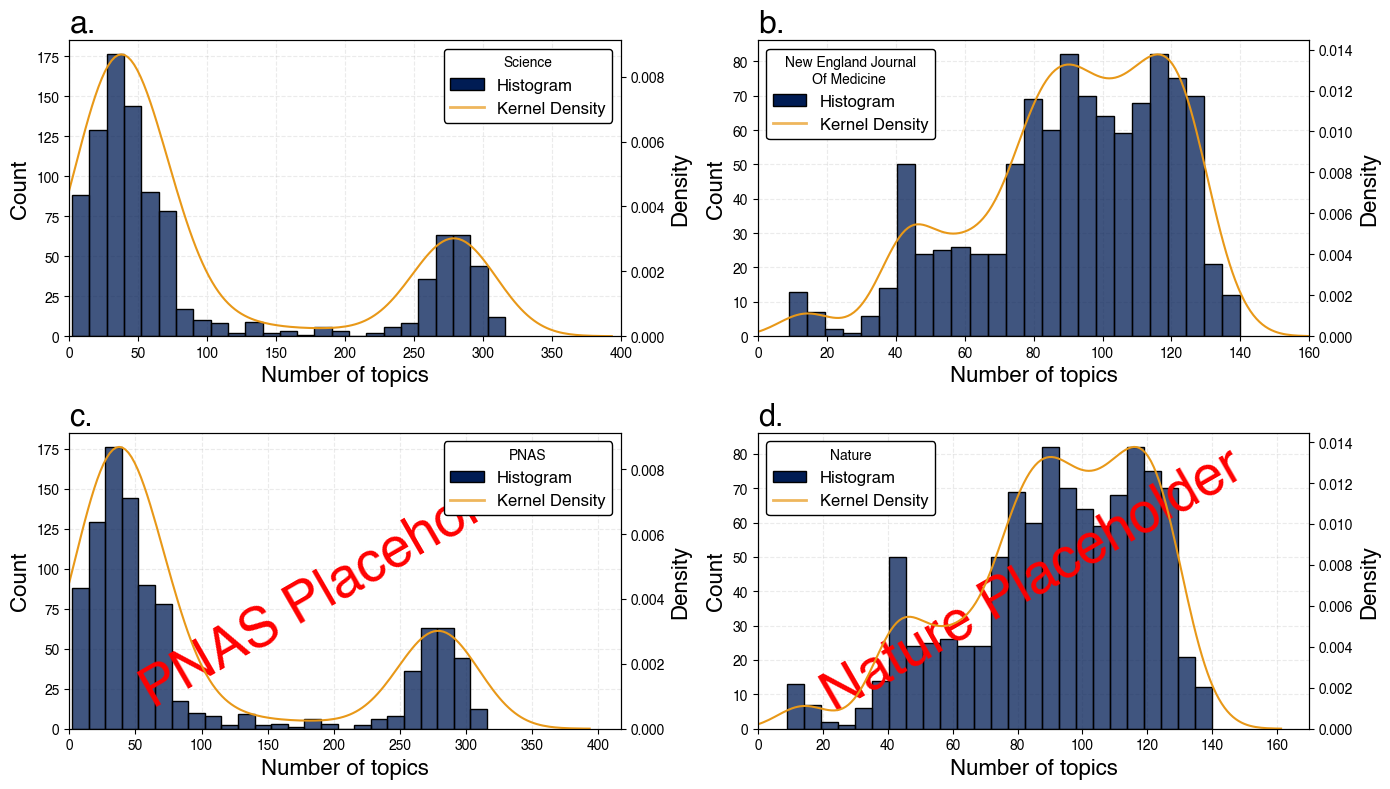

In [7]:
plot_topics_barplot(figure_path)

#### Section 3

Scientometric Analysis

In [40]:
import os
import warnings
import pandas as pd
from helper_figure_plotters import load_scientometrics,\
                                   desc_print_scientometrics,\
                                   make_table,\
                                   make_scientometric_ts

In [41]:
df_rng, df_hrng, df_qrng, df_prng, df_yr, df_yr_dom = load_scientometrics()

In [42]:
desc_print_scientometrics(df_rng, df_hrng, df_qrng, df_prng)

We have 219078 papers for "random number").
Modal journal: PloS one (2323 papers)
Modal subfield: Artificial Intelligence (10005 papers)
Modal field: Medicine (72923 papers)
Modal domain: Physical Sciences (85132 papers)

We have 5656 papers for "random number" and "hardware").
Modal journal: IET communications (117 papers)
Modal subfield: Computer Vision and Pattern Recognition (917 papers)
Modal field: Computer Science (3338 papers)
Modal domain: Physical Sciences (4894 papers)

We have 7947 papers for "random number" and "quantum").
Modal journal: Journal of biological chemistry/The Journal of biological chemistry (397 papers)
Modal subfield: Artificial Intelligence (2579 papers)
Modal field: Computer Science (3376 papers)
Modal domain: Physical Sciences (6957 papers)

We have 8396 papers for "random number" and "pseudo").
Modal journal: Journal of biological chemistry/The Journal of biological chemistry (217 papers)
Modal subfield: Computer Vision and Pattern Recognition (1950 

In [43]:
make_table(df_rng, df_hrng, df_qrng, df_prng, 'field')

,"""Random Numbers""","""Random Numbers"" and ""Hardware""","""Random Numbers"" and ""Quantum""","""Random Numbers"" and ""Pseudo"""
field,,,,
Medicine,72923,334,221.0,597
Computer Science,32130,3338,3376.0,4200
Engineering,19359,1283,471.0,1261
"Biochemistry, Genetics and Molecular Biology",14017,125,330.0,394
Mathematics,10702,23,340.0,357
Agricultural and Biological Sciences,9715,18,97.0,150
Physics and Astronomy,8921,139,2369.0,348
Environmental Science,7073,44,34.0,174
Psychology,5841,26,21.0,80


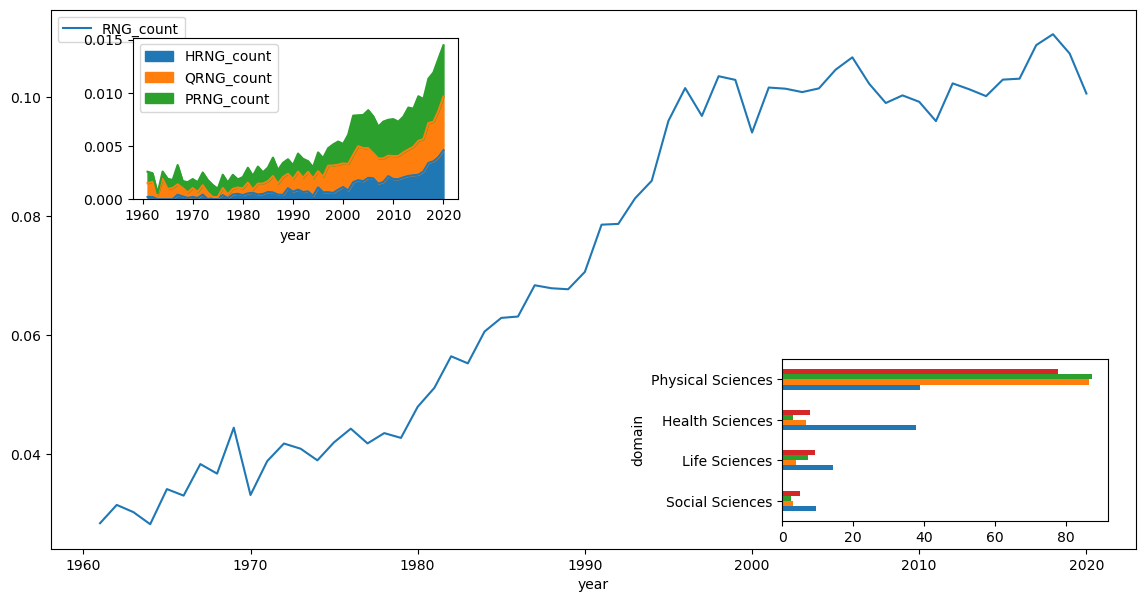

In [44]:
domain_df = make_table(df_rng, df_hrng, df_qrng, df_prng, 'domain')
domain_df = (domain_df/domain_df.sum()*100).round(2)
df_yr = make_scientometric_ts(df_rng, df_hrng, df_qrng, df_prng, df_yr, domain_df)

In [46]:
df_yr = df_yr.set_index('year')
for rng_type in ['RNG_count', 'HRNG_count', 'QRNG_count', 'PRNG_count']:
    print('The percent of OpenAlex which is focused on ' + rng_type.split('_')[0] +
          ' in year 1970 is ' + str(df_yr.loc[1970, rng_type].round(4)))
    print('The percent of OpenAlex which is focused on ' + rng_type.split('_')[0] +
          ' in year 2020 is ' + str(df_yr.loc[2020, rng_type].round(4)))

The percent of OpenAlex which is focused on RNG in year 1970 is 0.0332
The percent of OpenAlex which is focused on RNG in year 2020 is 0.1006
The percent of OpenAlex which is focused on HRNG in year 1970 is 0.0002
The percent of OpenAlex which is focused on HRNG in year 2020 is 0.0046
The percent of OpenAlex which is focused on QRNG in year 1970 is 0.0008
The percent of OpenAlex which is focused on QRNG in year 2020 is 0.005
The percent of OpenAlex which is focused on PRNG in year 1970 is 0.0008
The percent of OpenAlex which is focused on PRNG in year 2020 is 0.0048


#### Section 4

That is not to say that these are all of the times when random states can have dramatic effects on estimand outputs. Indeed, the set of _types_ where the effects are huge are far greater than the sparse number of examples which we show as part of this project. This is just a compactly presented set which makes dissemination of our message easiest!

Please don't hesitate to get in contact with any other examples which you can think of, or raise bugs if you find any issues!